# **Import Libraries and modules**

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import cifar10

### Load pre-shuffled cifar-10 data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)


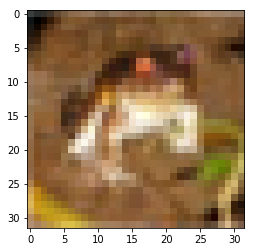

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
%pip install image-classifiers

     |████████████████████████████████| 81kB 3.0MB/s 


In [16]:
from classification_models.resnet import ResNet18, preprocess_input


X_train = preprocess_input(X_train)

n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# compile
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

W0701 19:04:37.410572 140433921906560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [18]:
model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))#, callbacks=[LearningRateScheduler(scheduler, verbose=1)])

W0701 19:06:35.730245 140433921906560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 674us/step - loss: 1.5880 - acc: 0.4697 - val_loss: 1.2409 - val_acc: 0.5790
Epoch 2/20
50000/50000 [==============================] - 23s 455us/step - loss: 1.0216 - acc: 0.6448 - val_loss: 1.0351 - val_acc: 0.6452
Epoch 3/20
50000/50000 [==============================] - 23s 458us/step - loss: 0.8575 - acc: 0.7007 - val_loss: 0.9498 - val_acc: 0.6742
Epoch 4/20
50000/50000 [==============================] - 23s 459us/step - loss: 0.7509 - acc: 0.7399 - val_loss: 0.8974 - val_acc: 0.6952
Epoch 5/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.6657 - acc: 0.7715 - val_loss: 0.8663 - val_acc: 0.7059
Epoch 6/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.5961 - acc: 0.7964 - val_loss: 0.8504 - val_acc: 0.7132
Epoch 7/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.5316 - acc: 0.8213 - val_loss: 0.

In [0]:
predicted = model.predict(X_test)


In [38]:
import numpy
# result = predicted == numpy.argmax(Y_test)
# print(result[0])

predicted = numpy.argmax(predicted, axis=1)
print(predicted.shape)
print(predicted)

(10000,)
[3 8 8 ... 5 1 7]


In [41]:
y_test = numpy.asarray(y_test)
print(y_test.shape)
print(y_test)

(10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [45]:
y_test = numpy.reshape(y_test, -1)
predicted = numpy.reshape(predicted, -1)

print(y_test.shape)

(10000,)


In [53]:


result = numpy.where(y_test!=predicted)
# print(result.shape)
print(result[0].shape)

misclassified = result[0][:50]
print(misclassified.shape)

(2578,)
(50,)


In [0]:
model.save('saved_model.h5')

# GRADCAM

In [0]:
from keras.preprocessing import image
import numpy as np
import cv2
import keras.backend as K
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
# model = VGG16(weights="imagenet")
# from skimage import io
# dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
# dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
# x = image.img_to_array(dog)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
def get_heatmap(index, heatmap_array):
  x = X_test[misclassified[index]]
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage1_unit2_conv2")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(X_test[index].reshape(32,32,3), 0.5, heatmap, 0.5, 0)
  heatmap_array = heatmap_array.append(superimposed_img)

In [0]:
array = []

for i in range(50):
  get_heatmap(i,array)

from google.colab.patches import cv2_imshow
for index in misclassified:
  cv2_imshow(array[0].reshape(32,32,3))

In [0]:
from google.colab.patches import cv2_imshow
for index in misclassified:
  cv2_imshow(array[0].reshape(32,32,3))

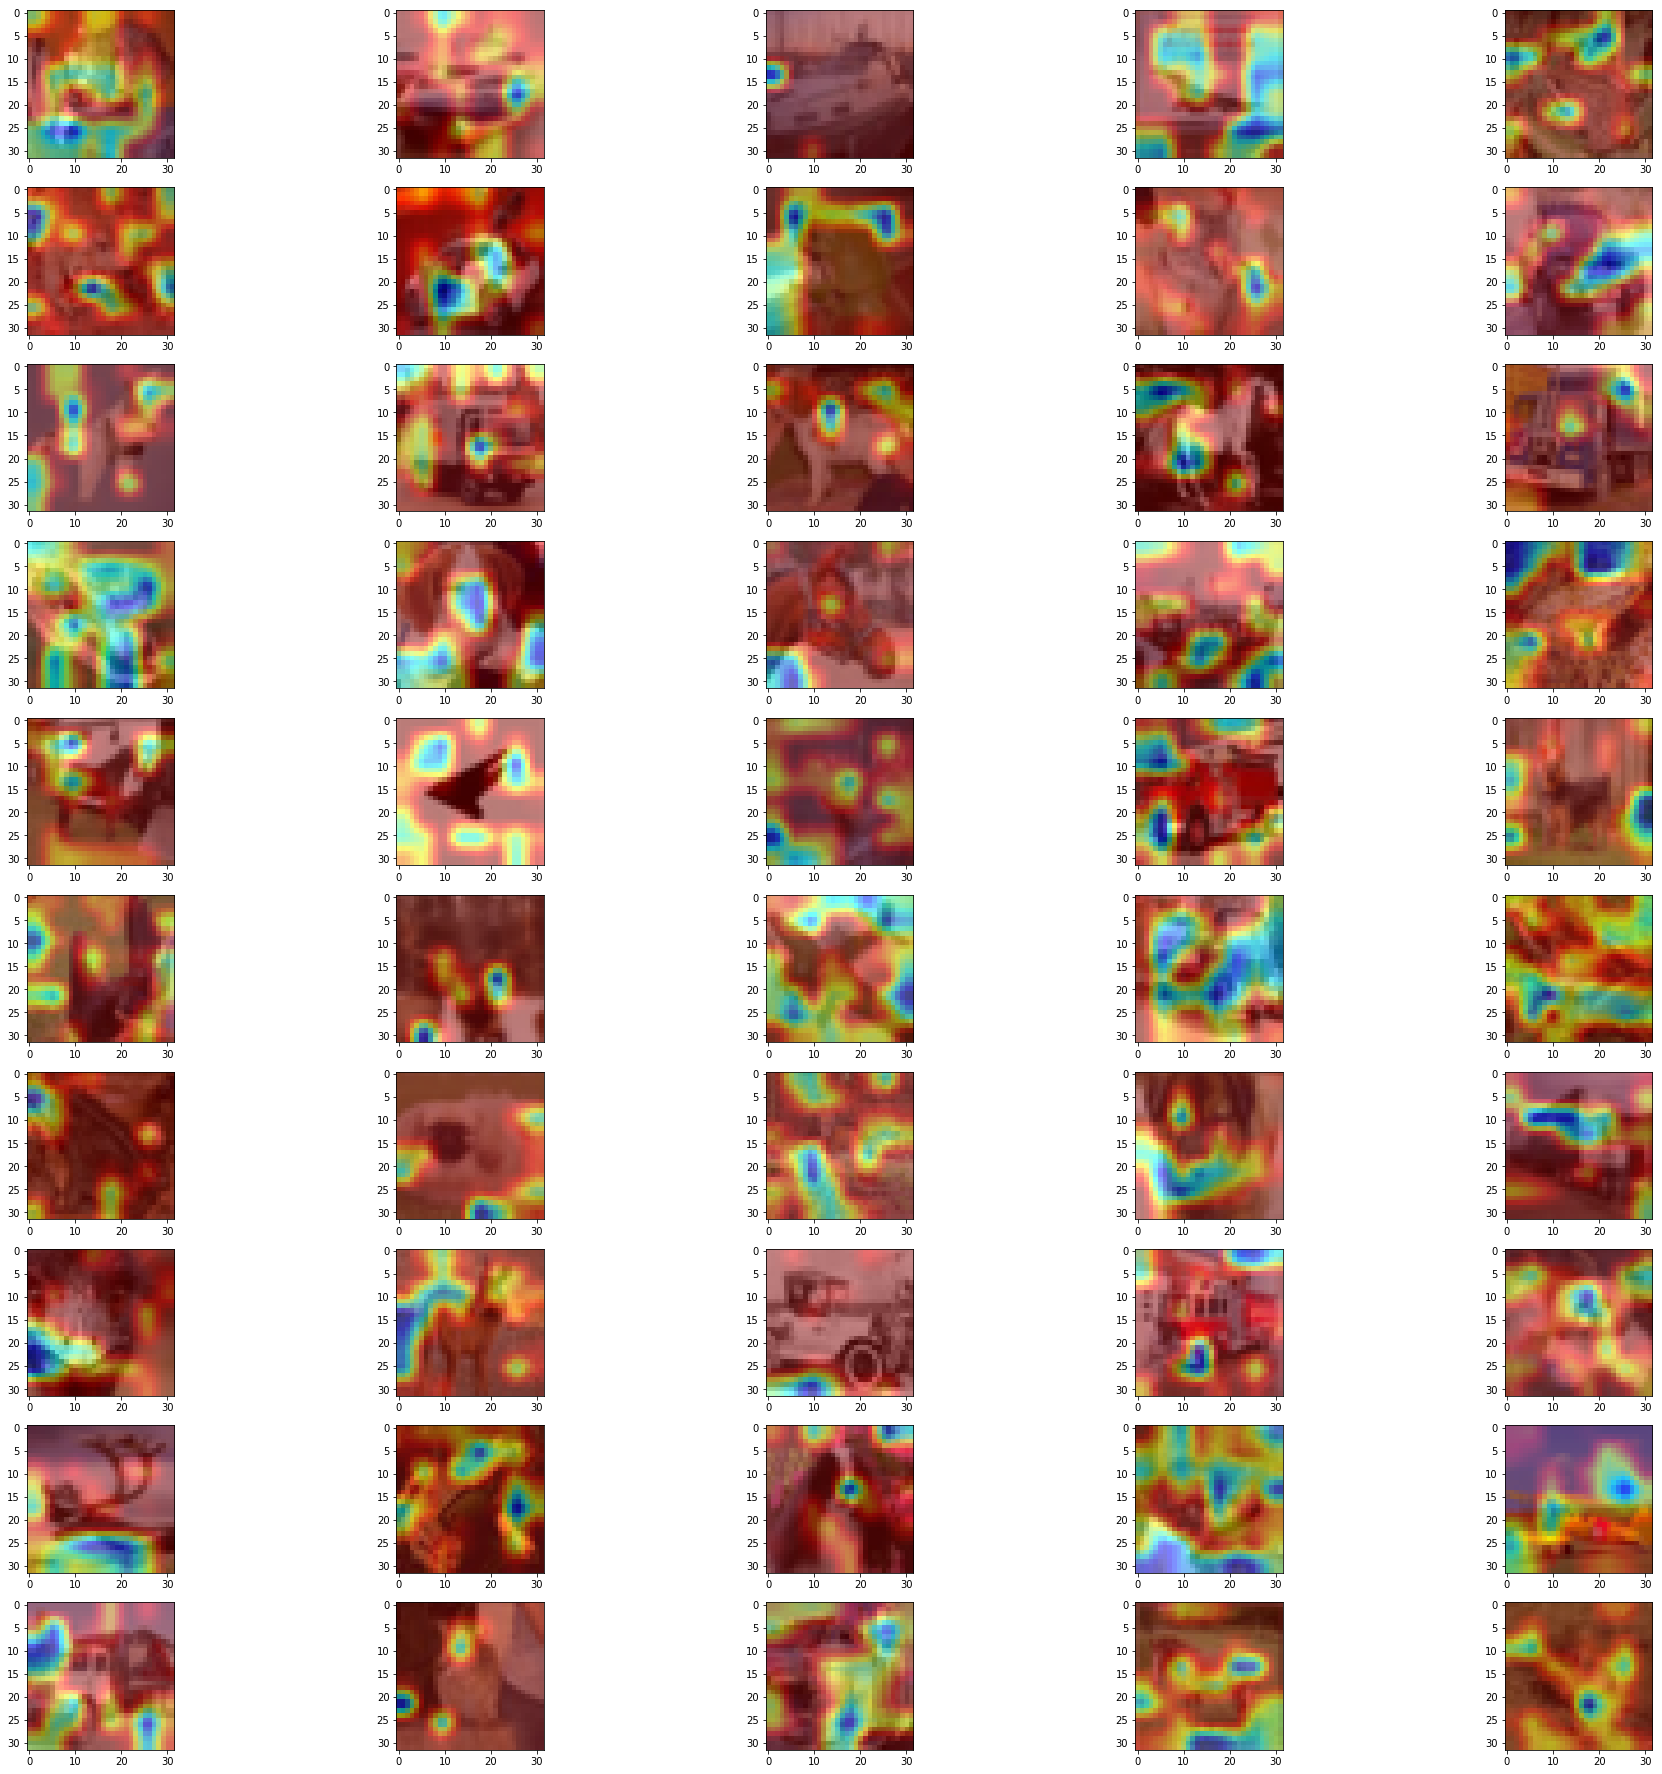

In [97]:
col_size = 5
row_size = 10
fig, ax = plt.subplots(row_size, col_size, figsize=(32,32))
for row in range(0,row_size): 
  for col in range(0, col_size): 
    ax[row][col].imshow(array[row*5+col].reshape(32,32,3))